<a href="https://colab.research.google.com/github/yeonghun00/real-estate/blob/main/traded.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import requests

In [11]:
url = 'https://www.reb.or.kr/r-one/statistics/excelDownLoadAllType2.do?statCd=LHT_64040&lhtSubGbn=06&dealObj=04&category=&landSrchGbn=CNT&researchDate_s=202112&researchDate_e=202207&regionCd='
url = 'https://www.reb.or.kr/r-one/statistics/excelDownLoadAllType2.do?statCd=LHT_64040&lhtSubGbn=06&dealObj=04&category=&landSrchGbn=CNT&researchDate=&regionCd' #데이터 전부
response = requests.get(url, headers ={'User-Agent': 'python-requests/2.22.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'})

In [20]:
import io
data = response.content
data = io.BytesIO(data)

In [21]:
import pandas as pd   
df = pd.read_excel(data)

지역 서울_종로구_xx 식으로 

In [22]:
df.columns = df.iloc[9]
df = df[10:]
df = df.T.ffill().T.ffill()
df

9,지 역,NaN,NaN,매입자거주지,2006년 01월,2006년 02월,2006년 03월,2006년 04월,2006년 05월,2006년 06월,...,2021년 10월,2021년 11월,2021년 12월,2022년 01월,2022년 02월,2022년 03월,2022년 04월,2022년 05월,2022년 06월,2022년 07월
10,전국,전국,전국,합계,77173.0,103718.0,133120.0,118127.0,121835.0,108639.0,...,119686.0,111172.0,101766.0,87825.0,85733.0,89915.0,104380.0,96979.0,88166.0,65921.0
11,전국,전국,전국,관할시군구내,43355.0,59383.0,73160.0,64991.0,63991.0,56417.0,...,56150.0,54788.0,47739.0,41755.0,45126.0,43043.0,49105.0,44602.0,42941.0,32601.0
12,전국,전국,전국,관할시도내,19608.0,25040.0,34088.0,29980.0,32173.0,30089.0,...,29328.0,26450.0,25605.0,24027.0,19147.0,22748.0,27480.0,23539.0,22868.0,16160.0
13,전국,전국,전국,관할시도외_서울,4914.0,6438.0,9656.0,8250.0,9444.0,7880.0,...,9682.0,8268.0,8229.0,6729.0,5892.0,6135.0,8126.0,8222.0,6140.0,4123.0
14,전국,전국,전국,관할시도외_기타,9296.0,12857.0,16216.0,14906.0,16227.0,14253.0,...,24526.0,21666.0,20193.0,15314.0,15568.0,17989.0,19669.0,20616.0,16217.0,13037.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,제주,서귀포시,서귀포시,합계,-,-,-,-,-,-,...,316.0,375.0,563.0,354.0,502.0,366.0,386.0,458.0,501.0,257.0
1496,제주,서귀포시,서귀포시,관할시군구내,-,-,-,-,-,-,...,146.0,182.0,263.0,170.0,339.0,173.0,178.0,200.0,243.0,121.0
1497,제주,서귀포시,서귀포시,관할시도내,-,-,-,-,-,-,...,25.0,30.0,79.0,32.0,37.0,26.0,41.0,47.0,92.0,39.0
1498,제주,서귀포시,서귀포시,관할시도외_서울,-,-,-,-,-,-,...,36.0,60.0,86.0,48.0,32.0,39.0,53.0,81.0,41.0,30.0


In [24]:
from datetime import datetime
df = df.rename(columns=dict(zip(df.columns[4:], [datetime.strptime(x, '%Y년 %m월') for x in df.columns[4:]])))

In [25]:
c = df.iloc[:, [0,1,2]]
c.columns = ['시도', '시군','구']
loc = ['_'.join(list(dict.fromkeys(([c.loc[x][y] for y in ['시도', '시군', '구']])))) for x in c.index]

In [26]:
df = df.iloc[: , 3:]
df.insert(loc=0, column='지역', value=loc)
df

9,지역,매입자거주지,2006-01-01 00:00:00,2006-02-01 00:00:00,2006-03-01 00:00:00,2006-04-01 00:00:00,2006-05-01 00:00:00,2006-06-01 00:00:00,2006-07-01 00:00:00,2006-08-01 00:00:00,...,2021-10-01 00:00:00,2021-11-01 00:00:00,2021-12-01 00:00:00,2022-01-01 00:00:00,2022-02-01 00:00:00,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00
10,전국,합계,77173.0,103718.0,133120.0,118127.0,121835.0,108639.0,91636.0,83938.0,...,119686.0,111172.0,101766.0,87825.0,85733.0,89915.0,104380.0,96979.0,88166.0,65921.0
11,전국,관할시군구내,43355.0,59383.0,73160.0,64991.0,63991.0,56417.0,46492.0,42607.0,...,56150.0,54788.0,47739.0,41755.0,45126.0,43043.0,49105.0,44602.0,42941.0,32601.0
12,전국,관할시도내,19608.0,25040.0,34088.0,29980.0,32173.0,30089.0,25484.0,22413.0,...,29328.0,26450.0,25605.0,24027.0,19147.0,22748.0,27480.0,23539.0,22868.0,16160.0
13,전국,관할시도외_서울,4914.0,6438.0,9656.0,8250.0,9444.0,7880.0,7360.0,6990.0,...,9682.0,8268.0,8229.0,6729.0,5892.0,6135.0,8126.0,8222.0,6140.0,4123.0
14,전국,관할시도외_기타,9296.0,12857.0,16216.0,14906.0,16227.0,14253.0,12300.0,11928.0,...,24526.0,21666.0,20193.0,15314.0,15568.0,17989.0,19669.0,20616.0,16217.0,13037.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,제주_서귀포시,합계,-,-,-,-,-,-,82.0,97.0,...,316.0,375.0,563.0,354.0,502.0,366.0,386.0,458.0,501.0,257.0
1496,제주_서귀포시,관할시군구내,-,-,-,-,-,-,48.0,59.0,...,146.0,182.0,263.0,170.0,339.0,173.0,178.0,200.0,243.0,121.0
1497,제주_서귀포시,관할시도내,-,-,-,-,-,-,8.0,11.0,...,25.0,30.0,79.0,32.0,37.0,26.0,41.0,47.0,92.0,39.0
1498,제주_서귀포시,관할시도외_서울,-,-,-,-,-,-,12.0,9.0,...,36.0,60.0,86.0,48.0,32.0,39.0,53.0,81.0,41.0,30.0


In [68]:
def get_data(loc=['전국'], buyer=['합계']):
  if type(loc) == str : loc = [loc]
  if type(buyer) == str : buyer = [buyer]
  t = df.loc[df['지역'].isin(loc)]
  return t.loc[t['매입자거주지'].isin(buyer)]


In [69]:
t = get_data(['서울', '부산'])
t

9,지역,매입자거주지,2006-01-01 00:00:00,2006-02-01 00:00:00,2006-03-01 00:00:00,2006-04-01 00:00:00,2006-05-01 00:00:00,2006-06-01 00:00:00,2006-07-01 00:00:00,2006-08-01 00:00:00,...,2021-10-01 00:00:00,2021-11-01 00:00:00,2021-12-01 00:00:00,2022-01-01 00:00:00,2022-02-01 00:00:00,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00
15,서울,합계,11134.0,18818.0,26501.0,24970.0,27652.0,21608.0,17313.0,17485.0,...,11121.0,11409.0,11568.0,9385.0,8027.0,9131.0,9509.0,11627.0,10043.0,9547.0
145,부산,합계,5722.0,7428.0,8117.0,7503.0,7764.0,6319.0,4412.0,4096.0,...,8146.0,6647.0,6776.0,4450.0,3579.0,6542.0,5098.0,5550.0,4636.0,3755.0


In [ ]:
df.rename(index={'ONE': 'Row_1'})


In [64]:
t['지역'] + '_' + t['매입자거주지'] 

15    서울_합계
dtype: object

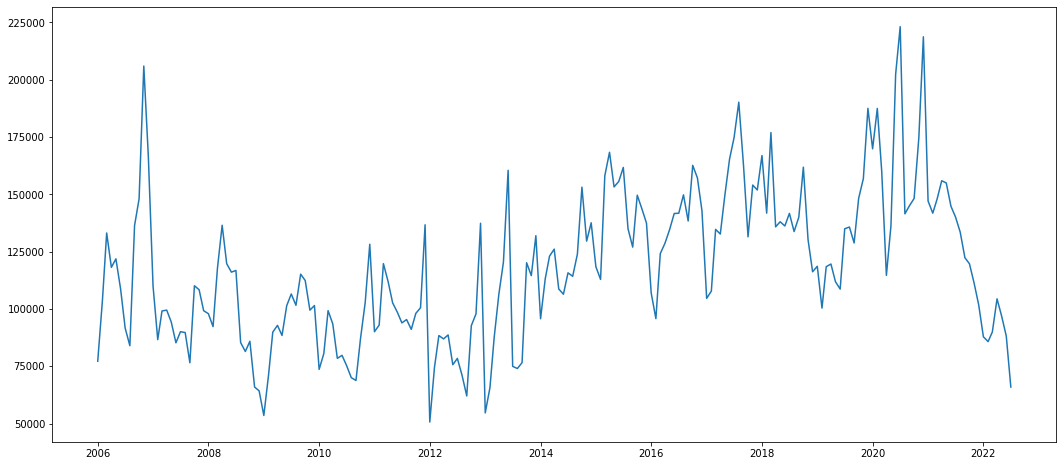

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,8))
plt.plot(df[(df['지역'] == '전국') & (df['매입자거주지'] == '합계')].iloc[:, 2:].T)
plt.show()

In [37]:
df[(df['지역'] == ('전국' or '서울')) & (df['매입자거주지'] == '합계')].iloc[:, 2:]

9,2006-01-01,2006-02-01,2006-03-01,2006-04-01,2006-05-01,2006-06-01,2006-07-01,2006-08-01,2006-09-01,2006-10-01,...,2021-10-01,2021-11-01,2021-12-01,2022-01-01,2022-02-01,2022-03-01,2022-04-01,2022-05-01,2022-06-01,2022-07-01
10,77173.0,103718.0,133120.0,118127.0,121835.0,108639.0,91636.0,83938.0,136359.0,148040.0,...,119686.0,111172.0,101766.0,87825.0,85733.0,89915.0,104380.0,96979.0,88166.0,65921.0


In [ ]:
for city in cities:
  plt.plot(hjp_df[city])
plt.legend(cities)
plt.show()